In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'D:\ML Projects\cardekho.csv')
data.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [3]:
data.shape

(8128, 12)

In [4]:
data.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [5]:
data['max_power'].fillna(data['max_power'].mode()[0],inplace=True)

C:\Users\rehan\AppData\Local\Temp\ipykernel_4372\2172009518.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['max_power'].fillna(data['max_power'].mode()[0],inplace=True)


In [6]:
data.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power               0
seats                 221
dtype: int64

In [7]:
data.select_dtypes(include='float64').columns

Index(['mileage(km/ltr/kg)', 'engine', 'seats'], dtype='object')

In [8]:
from sklearn.impute import SimpleImputer
float_cols=['mileage(km/ltr/kg)', 'engine', 'seats']
imputer = SimpleImputer(strategy='mean')
data[float_cols]=imputer.fit_transform(data[float_cols])


In [9]:
data.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

<Axes: >

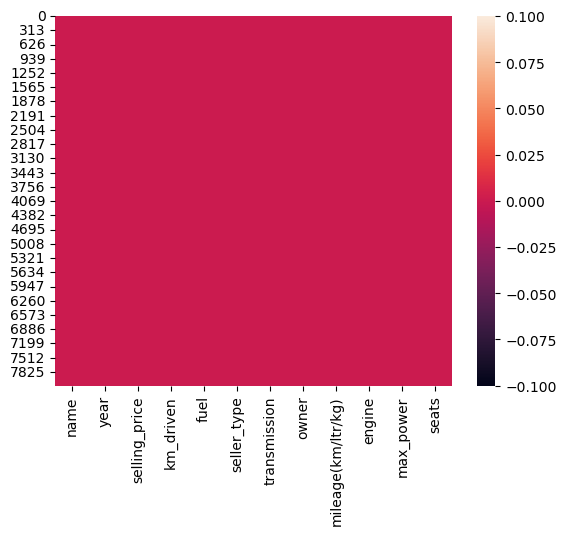

In [10]:
sns.heatmap(data.isnull())

In [11]:
#handling duplicates
data.drop_duplicates(inplace=True)

<Axes: xlabel='selling_price'>

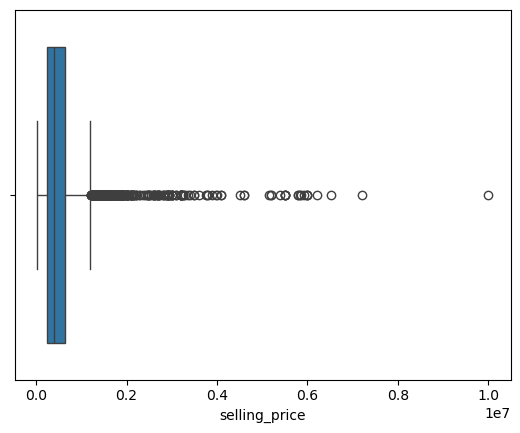

In [12]:
#remove outliers using IQR 
#for selling price
sns.boxplot(x='selling_price',data=data)

In [13]:
q1=data['selling_price'].quantile(0.25)
q3=data['selling_price'].quantile(0.75)

IQR=q3-q1

min=q1-(1.5*IQR)
max=q3+(1.5*IQR)
min,max

(np.float64(-325250.0), np.float64(1208750.0))

In [14]:
new_data=data[data['selling_price']<=max]

<Axes: xlabel='selling_price'>

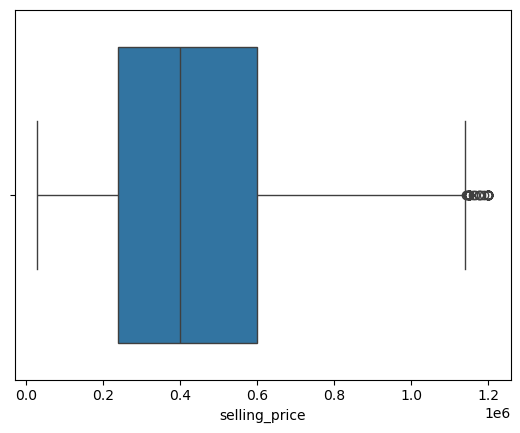

In [15]:
sns.boxplot(x='selling_price',data=new_data)

<Axes: xlabel='km_driven'>

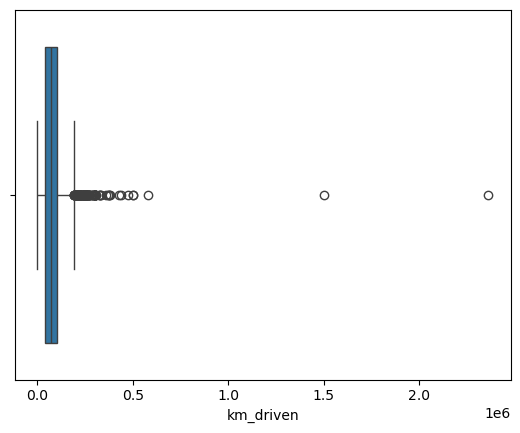

In [16]:
#outlier removal - km_driven
sns.boxplot(x='km_driven',data=data)

In [17]:
q1 = new_data['km_driven'].quantile(0.25)
q3 = new_data['km_driven'].quantile(0.75)

IQR = q3 - q1

min=q1-(1.5*IQR)
max=q3+(1.5*IQR)
min,max

(np.float64(-50000.0), np.float64(190000.0))

In [18]:
new_data=new_data[new_data['km_driven']<=max]

<Axes: xlabel='km_driven'>

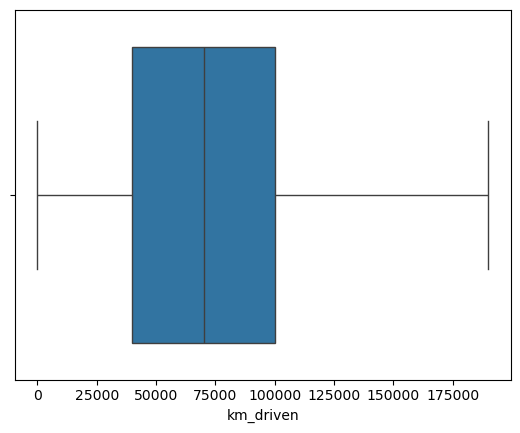

In [19]:
sns.boxplot(x='km_driven',data=new_data)

<Axes: xlabel='mileage(km/ltr/kg)'>

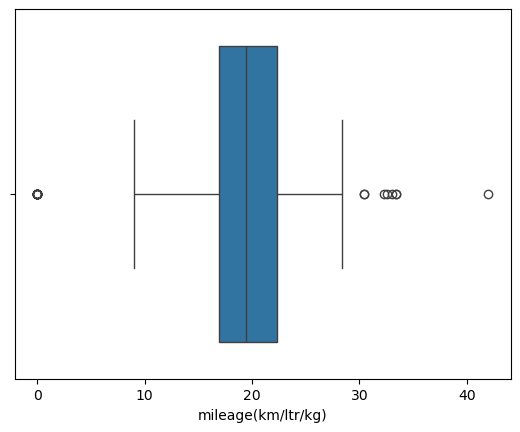

In [20]:
#outlier removal - mileage(km/ltr/kg)
sns.boxplot(x='mileage(km/ltr/kg)',data=data)

In [21]:
q1 = new_data['mileage(km/ltr/kg)'].quantile(0.25)
q3 = new_data['mileage(km/ltr/kg)'].quantile(0.75)
IQR=q3-q1

min = q1-(1.5*IQR)
max = q3+(1.5*IQR)
min,max

(np.float64(9.440000000000003), np.float64(30.4))

In [22]:
new_data=new_data[new_data['mileage(km/ltr/kg)']<=max]
new_data=new_data[new_data['mileage(km/ltr/kg)']>=min]

<Axes: xlabel='mileage(km/ltr/kg)'>

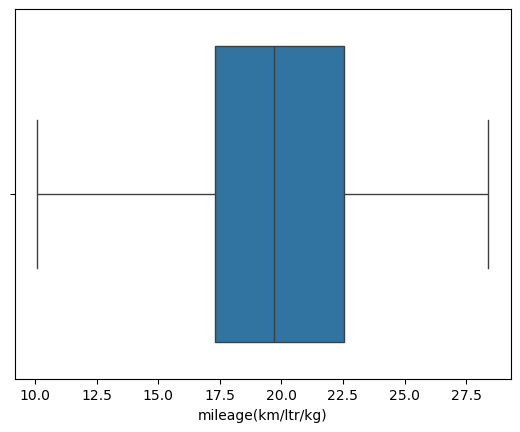

In [23]:
sns.boxplot(x='mileage(km/ltr/kg)',data=new_data)

<Axes: xlabel='engine'>

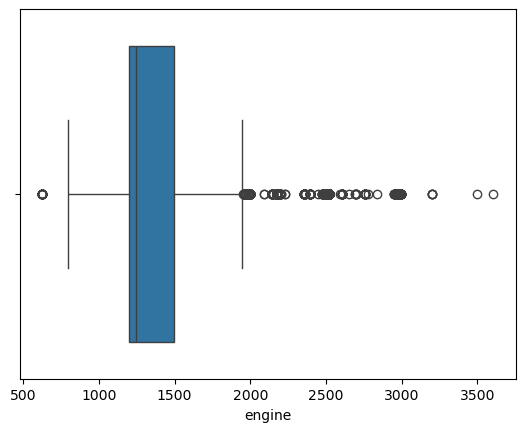

In [24]:
#outlier removal-engine
sns.boxplot(x='engine',data=data)

In [25]:
q1 = new_data['engine'].quantile(0.25)
q3 = new_data['engine'].quantile(0.75)

IQR = q3-q1
min = q1-(1.5*IQR)
max = q3+(1.5*IQR)
min,max

(np.float64(744.5), np.float64(1948.5))

In [26]:
new_data=new_data[new_data['engine']<=max]
new_data=new_data[new_data['engine']>=min]

In [27]:
new_data.shape

(5585, 12)

In [28]:
#data cleaning is done 
#now EDA process

#step1 - univariate analysis
new_data.nunique()

name                  1533
year                    29
selling_price          507
km_driven              735
fuel                     4
seller_type              3
transmission             2
owner                    4
mileage(km/ltr/kg)     280
engine                  67
max_power              205
seats                    9
dtype: int64

In [29]:
#find skewed data (for numerical featurres
new_data.skew(numeric_only=True)

year                 -1.079671
selling_price         0.676303
km_driven             0.547609
mileage(km/ltr/kg)    0.187506
engine               -0.256575
seats                 3.815278
dtype: float64

In [30]:
#univariate analysis is done for numeric + categorical features... results are wriiten in book
#bivariate analyisis is also done

In [31]:
#data transformation starts
#log tranformation starts from here to selling_price

In [32]:
import numpy as np
# Log transform target
new_data['selling_price'] = np.log(new_data['selling_price'])

In [33]:
print(new_data[['selling_price']].skew())

selling_price   -0.697042
dtype: float64


In [34]:
#checking correlation
corr_matrix = new_data.select_dtypes(include=['int64', 'float64']).corr()
print(corr_matrix['selling_price'].sort_values(ascending=False))

selling_price         1.000000
year                  0.811059
mileage(km/ltr/kg)    0.379399
engine                0.342614
seats                 0.177947
km_driven            -0.328580
Name: selling_price, dtype: float64


In [35]:
#I am extracting only the brand name from name variable
brand_list = [
    'Maruti', 'Hyundai', 'Skoda', 'Honda', 'Toyota', 'Ford', 
    'Mahindra', 'Tata', 'Chevrolet', 'Renault', 'Nissan', 
    'BMW', 'Audi', 'Mercedes-Benz', 'Jeep', 'Land Rover', 'Isuzu',
    # Handle two-word brands by looking for the second word as well
    'Suzuki', 'Motors', # You will handle these in the function below
]
def extract_brand(car_name, brand_list):
    """
    Extracts the brand name from a full car name string.
    Checks the first few words against a predefined brand list.
    """
    words = car_name.split()
    
    # Check the first word
    if words and words[0] in brand_list:
        return words[0]
        
    # Example: Check for common two-word brands (Maruti Suzuki, Tata Motors)
    # The car name is usually structured as "Brand Model..."
    if len(words) >= 2:
        # Check for two-word combinations if needed (e.g., 'Land Rover')
        two_word = f"{words[0]} {words[1]}"
        if two_word in brand_list:
            return two_word
            
    # If the first word wasn't found, check the second word as a fallback 
    # (e.g., if the car name started with a year or an unnecessary qualifier)
    if len(words) >= 2 and words[1] in brand_list:
        return words[1]
        
    # Return 'Other' or the first word as a default fallback
    return 'Other'

# new_data is your DataFrame
# Apply the function to the 'name' column
new_data['brand'] = new_data['name'].apply(lambda x: extract_brand(x, brand_list))

# Verify the result
print(new_data['brand'].value_counts())

brand
Maruti           2140
Hyundai          1223
Tata              487
Ford              338
Honda             336
Other             264
Renault           199
Mahindra          188
Chevrolet         161
Toyota            116
Nissan             71
Skoda              57
Mercedes-Benz       3
Audi                1
BMW                 1
Name: count, dtype: int64


In [36]:
#i have removed name variable
new_data.drop('name',axis=1,inplace=True)

In [37]:
#apply one hot encoding to brand,fuel,seller_type,transmission

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first').set_output(transform='pandas')
ohetransform = ohe.fit_transform(new_data[['brand','seller_type','transmission','fuel']])
print(ohetransform)

      brand_BMW  brand_Chevrolet  brand_Ford  brand_Honda  brand_Hyundai  \
0           0.0              0.0         0.0          0.0            0.0   
1           0.0              0.0         0.0          0.0            0.0   
2           0.0              0.0         0.0          1.0            0.0   
3           0.0              0.0         0.0          0.0            1.0   
4           0.0              0.0         0.0          0.0            0.0   
...         ...              ...         ...          ...            ...   
8121        0.0              0.0         0.0          0.0            0.0   
8122        0.0              0.0         0.0          0.0            1.0   
8123        0.0              0.0         0.0          0.0            1.0   
8124        0.0              0.0         0.0          0.0            1.0   
8125        0.0              0.0         0.0          0.0            0.0   

      brand_Mahindra  brand_Maruti  brand_Mercedes-Benz  brand_Nissan  \
0             

In [38]:
new_data=pd.concat([new_data,ohetransform],axis=1).drop(columns=['fuel','transmission','seller_type','brand'])
#onehotEncoding is successfull

In [39]:
#label encoding for owner variable
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
la.fit(new_data['owner'])

LabelEncoder()

In [40]:
new_data['owner']=la.transform(new_data['owner'])

In [41]:
new_data.head(10)
#label encoding is done for owner successfully

,year,selling_price,km_driven,owner,mileage(km/ltr/kg),engine,max_power,seats,brand_BMW,brand_Chevrolet,...,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,fuel_Diesel,fuel_LPG,fuel_Petrol
0,2014,13.017003,145500,0,23.40,1248.0,74,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,2014,12.821258,120000,2,21.14,1498.0,103.52,5.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,2006,11.970350,140000,3,17.70,1497.0,78,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,2010,12.323856,127000,0,23.00,1396.0,90,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,2007,11.775290,120000,0,16.10,1298.0,88.2,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,2017,12.994530,45000,0,20.14,1197.0,81.86,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,2007,11.472103,175000,0,17.30,1061.0,57.5,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7,2001,10.714418,5000,2,16.10,796.0,37,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,2011,12.765688,90000,0,23.59,1364.0,67.1,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
9,2013,12.206073,169000,0,20.00,1399.0,68.1,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [42]:
ultra_new = new_data.drop('max_power',axis=1)

In [43]:
print(ultra_new.shape)

(5585, 27)


In [44]:
#specify x & y
x = ultra_new.drop('selling_price',axis=1)
y = ultra_new['selling_price']

In [45]:
#TTS
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [46]:
#feature scaling
numeric_cols = ['year','km_driven','mileage(km/ltr/kg)','engine','seats']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])

In [47]:
#training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred = model.predict(x_test)

In [49]:
model.score(x_train,y_train)

0.8396056558039039

In [50]:
model.score(x_test,y_test)

0.8258575062821716

In [51]:
print(x_train.shape)

(3909, 26)


In [52]:
#evaluate metrics
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_log = model.predict(x_test)
y_pred_actual = np.exp(y_pred_log)
y_test_actual = np.exp(y_test)

mae_actual = mean_absolute_error(y_test_actual, y_pred_actual)
rmse_actual = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print("MAE in ₹:", mae_actual)
print("RMSE in ₹:", rmse_actual)

MAE in ₹: 77695.72503619704
RMSE in ₹: 106605.54204684542


In [53]:
coeff = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': model.coef_
})

coeff.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
6,brand_BMW,0.570864
0,year,0.480167
23,fuel_Diesel,0.388631
24,fuel_LPG,0.257271
4,engine,0.210560
25,fuel_Petrol,0.186454
21,seller_type_Trustmark Dealer,0.048183
5,seats,0.018527
3,mileage(km/ltr/kg),0.000656
2,owner,-0.041636


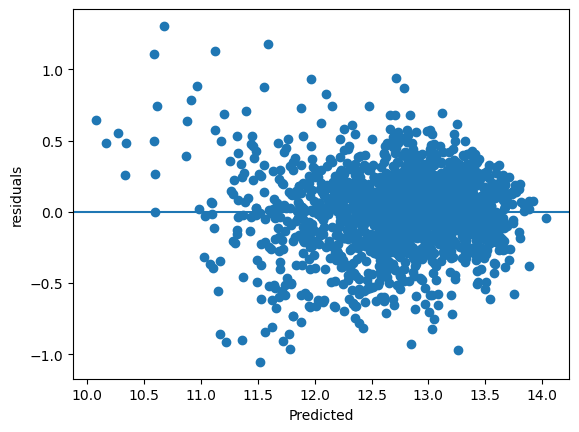

In [54]:
residuals = y_test - y_pred
plt.scatter(y_pred,residuals)
plt.axhline(y = 0)
plt.xlabel('Predicted')
plt.ylabel('residuals')
plt.show()

In [55]:
x_train.columns

Index(['year', 'km_driven', 'owner', 'mileage(km/ltr/kg)', 'engine', 'seats',
       'brand_BMW', 'brand_Chevrolet', 'brand_Ford', 'brand_Honda',
       'brand_Hyundai', 'brand_Mahindra', 'brand_Maruti',
       'brand_Mercedes-Benz', 'brand_Nissan', 'brand_Other', 'brand_Renault',
       'brand_Skoda', 'brand_Tata', 'brand_Toyota', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol'],
      dtype='object')

In [56]:
#predictions
import pandas as pd
import numpy as np

# empty dataframe with same columns
new_car = pd.DataFrame(columns=x_train.columns)

# ek row add karo
new_car.loc[0] = 0

In [61]:
new_car.at[0, 'year'] = 2018
new_car.at[0, 'km_driven'] = 5000
new_car.at[0, 'mileage(km/ltr/kg)'] = 23
new_car.at[0, 'engine'] = 2000
new_car.at[0, 'seats'] = 5
new_car.at[0, 'owner'] = 0

# One hot columns
new_car.at[0, 'brand_BMW'] = 1
new_car.at[0, 'fuel_Petrol'] = 1
new_car.at[0, 'transmission_Manual'] = 1
new_car.at[0, 'seller_type_Individual'] = 1

In [62]:
numeric_cols = ['year','km_driven','mileage(km/ltr/kg)','engine','seats']

new_car[numeric_cols] = scaler.transform(new_car[numeric_cols])

In [63]:
y_pred_log = model.predict(new_car)

In [64]:
y_pred_actual = np.exp(y_pred_log)

print("Predicted Car Price in ₹:", round(y_pred_actual[0], 0))

Predicted Car Price in ₹: 4262165.0
